In [ ]:

import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


100 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


200 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


300 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


400 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


500 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


600 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


700 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


800 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


900 regions found in this atlas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


1000 regions found in this atlas
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
[0.55, 0.7, 0.75, 0.8, 0.75, 0.7, 0.7, 0.8, 0.8, 0.75]
[0.6, 0.65, 0.55, 0.65, 0.7, 0.65, 0.6, 0.55, 0.5, 0.55]


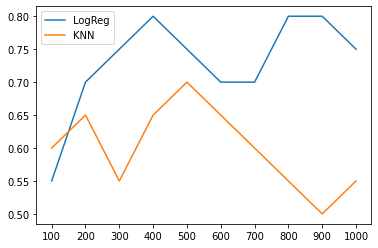

In [ ]:
def plot_each_n_rois(i):
  yeo = datasets.fetch_atlas_schaefer_2018(n_rois=i) # this needs to be modified for some tasks
  print('%i regions found in this atlas' % (len(np.unique(nib.load(yeo.maps).get_data().ravel())) 
  - 1))
  masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, 
  memory='nilearn_cache')
  input_variables = masker.fit_transform(brain_data.gray_matter_maps)
  output_variable = np.array(brain_data.ext_vars.mf == b'F', dtype=np.int) # gives 1 for females and 0 for males

  ############## note no bootstrap, just taking the first 80% of 100 subjects, that is the first 80 subjects as training set ############

  train_input = input_variables[:80]
  train_output = output_variable[:80]

  test_input = input_variables[80:]
  test_output = output_variable[80:]

  Logmodel = LogisticRegression(penalty='l2',C=1.0).fit(train_input,train_output)
  KNN = KNeighborsClassifier(n_neighbors=5).fit(train_input,train_output)
  log_predict_output = Logmodel.predict(test_input)
  KNN_predict_output = KNN.predict(test_input)
  log_accuracy = np.sum(log_predict_output == test_output)/len(test_output)
  KNN_accuracy = np.sum(KNN_predict_output == test_output)/len(test_output)


  return i, log_accuracy, KNN_accuracy


x_list = [] ### n_rois
log_y_list = [] ### accuracy
KNN_y_list = []

for i in range (100,1100,100):
  i, log_accuracy, KNN_accuracy = plot_each_n_rois(i)

  # print("i: ", i,"accuracy: ", accuracy)
  x_list.append(i)
  log_y_list.append(log_accuracy)
  KNN_y_list.append(KNN_accuracy)

print(x_list)
print(log_y_list)
print(KNN_y_list)
plt.xticks(x_list)
plt.plot(x_list,log_y_list,label='LogReg')
plt.plot(x_list,KNN_y_list,label='KNN')

plt.legend()
plt.show()